# Simple search demos

### Exercise 1.
Define a depth-first search algorithm, first using recursion and than using a stack.
On input
```python
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': [],
    'F': []
}

dfs(graph, 'A')
```
it should return string ' A B D E C F '

### Solution 1.
We use adjacency list to represent the graph, the initial node is a number, and we also keep track of the nodes visited during traversal.

In [1]:

def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end=" ")

    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

We run the test example.

In [2]:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': [],
    'F': []
}

start = 'A'

dfs(graph, start)

A B D E C F 

We can visualise the graph.

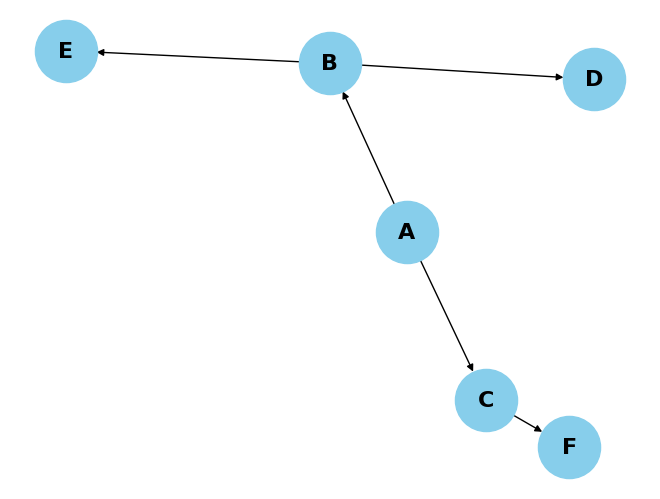

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def visualiseGraph(graph):
    # Create a directed graph in NetworkX
    G = nx.DiGraph()

    # Add nodes and edges from the adjacency list
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    # Draw the graph
    pos = nx.spring_layout(G)  # Layout for positioning nodes
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=16, font_color='black', font_weight='bold', arrows=True)

    # Display the graph
    plt.show()

visualiseGraph(graph)

We now define dfs using stack.

In [ ]:
def dfs_iterative(graph, start):
    visited = set()
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            stack.extend(reversed(graph[node]))  # Reverse to maintain the order of traversal
            # reversed takes elements in reverse order

dfs_iterative(graph,start)

A B D E C F 

### Exercise 2
Implement BFS on 'graph'. What result you get?

### Solution 2

In [ ]:
from collections import deque

def bfs(graph, start):
    visited = set()
    # We now define our frontier
    queue = deque([start])  # a generalization of stack and queues

    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            queue.extend(graph[node])

bfs(graph,start)

A B C D E F 

### Exercise 3
Add weights and implement UCS, which you test on following input:
``` python

graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 2), ('E', 5)],
    'C': [('F', 3)],
    'D': [],
    'E': [],
    'F': []
}

ucs(graph, 'A', 'F')
```
What result do you expect?

### Solution 3

In [ ]:
import heapq

def ucs(graph, start, goal):
    queue = [(0, start)]  # (cost, node)
    visited = set()

    while queue:
        cost, node = heapq.heappop(queue)
        # the heappop method pops and returns the smallest element of the given heap.

        if node not in visited:
            print(f"Visiting {node} with cost {cost}")
            visited.add(node)

            if node == goal:
                print(f"Reached {goal} with cost {cost}")
                return

            for neighbor, weight in graph[node]:
                # adding neighbors with the corresponding edge cost
                if neighbor not in visited:
                    heapq.heappush(queue, (cost + weight, neighbor)) # mask for exercise


In [ ]:
graphW = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 2), ('E', 5)],
    'C': [('F', 3)],
    'D': [],
    'E': [],
    'F': []
}

ucs(graph, 'A', 'F')

Visiting A with cost 0
Visiting B with cost 1
Visiting D with cost 3
Visiting C with cost 4
Visiting E with cost 6
Visiting F with cost 7
Reached F with cost 7


### We can visualise the graph as follows.

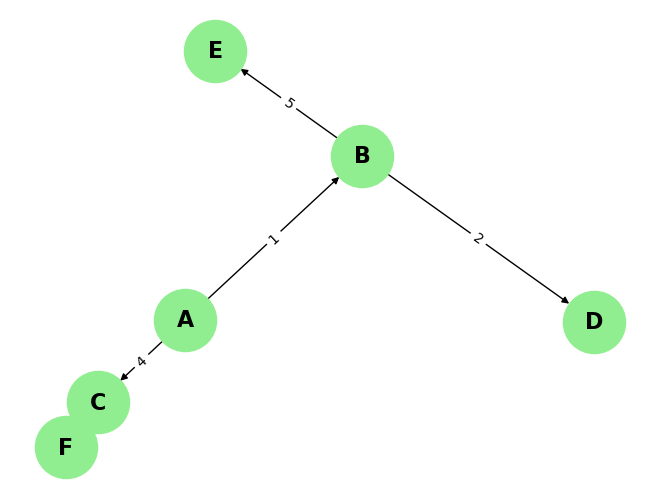

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualiseGraphW(graph):
    # Create a directed graph in NetworkX
    G = nx.DiGraph()

    # Add nodes and weighted edges from the adjacency list
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)

    # Draw the graph
    pos = nx.spring_layout(G)  # Layout for positioning nodes
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=16, font_color='black', font_weight='bold', arrows=True)

    # Draw edge labels (the weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Display the graph
    plt.show()

visualiseGraphW(graphW)


### Exercise 4.
Implement iterative deepening search on the example of unweighted graph.

### Solution 4

In [ ]:
# Depth-Limited Search (DLS)
def dls(graph, node, goal, depth, visited=None):
    if visited is None:
        visited = set()
    visited.add(node)

    if node == goal:
        return True  # Goal found

    if depth == 0:
        return False  # Depth limit reached

    # Explore neighbors
    for neighbor in graph[node]:
        if neighbor not in visited:
            if dls(graph, neighbor, goal, depth - 1, visited): # mask for exercise
                return True
    return False

# Iterative Deepening Search (IDS)
def ids(graph, start, goal, max_depth):
    for depth in range(max_depth + 1):
        print(f"Searching at depth {depth}...")
        visited = set()
        if dls(graph, start, goal, depth, visited):  # every time the maximal depth increases
            print(f"Goal {goal} found at depth {depth}")
            return True
    print(f"Goal {goal} not found within depth {max_depth}")
    return False

# Example usage
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': [],
    'F': []
}

start_node = 'A'
goal_node = 'F'
max_depth = 4

# Perform IDS
ids(graph, start_node, goal_node, max_depth)

Searching at depth 0...
Searching at depth 1...
Searching at depth 2...
Goal F found at depth 2


True

### Exercise 5 (HW)
Use the previous code to compare time and space performance of reaching a target node from start node with dfs, bfs, ids on randomly generated problem instances with 1000 nodes each.

### Implement Hanoi towers with UCS (HW)

Test case should have input as follows
``` python
n=4 # total number number of pegs
disks = list(range(1, n + 1))
initial_state = [disks, [], []]  # All disks on the first peg
goal_state = [[], [], disks]  # All disks on the third peg

graph = buildStateSpace(n)
ucs(graph, initial_state, goal_state)
```

output e.g. for n=2

[[1,2],[],[]] #'move disk of size 1 from peg 1 to peg 2'

[[2],[1],[]]  # move disk of size 2 from peg 1 to peg 3'

[[],[1],[2]]  #'move disk of size 1 from peg 2 to peg 3'

[[],[],[1,2]]


### Solution

In [ ]:
import heapq

verbose = True

# Function to check if a move is valid
def is_valid_move(state, from_peg, to_peg):
    if not state[from_peg]:  # If the from_peg is empty, move is invalid
        return False
    if not state[to_peg]:  # If the to_peg is empty, move is valid
        return True
    return state[from_peg][-1] < state[to_peg][-1]  # Disk must be smaller than the one on the destination peg

# Function to perform the move
def move_disk(state, from_peg, to_peg):
    new_state = [peg[:] for peg in state]  # Create a copy of the current state
    disk = new_state[from_peg].pop()  # Remove top disk from the from_peg
    new_state[to_peg].append(disk)  # Add it to the to_peg
    return new_state

# UCS algorithm for Towers of Hanoi
def ucs_hanoi(start_state, goal_state):
    # Priority queue for UCS (heap)
    frontier = []
    heapq.heappush(frontier, (0, start_state))  # (cost, state)
    if verbose:
        print(frontier)

    # Dictionary to track visited states and their cost
    visited = {tuple(tuple(peg) for peg in start_state): 0}

    while frontier:
        current_cost, current_state = heapq.heappop(frontier)
        if verbose:
            print(frontier)
        # Check if we've reached the goal
        if current_state == goal_state:
            print(f"Solution found with cost {current_cost}")
            if verbose:
                print(current_state)
            return current_state

        # Try all possible moves between the 3 pegs
        for from_peg in range(3):
            for to_peg in range(3):
                if from_peg != to_peg and is_valid_move(current_state, from_peg, to_peg):
                    new_state = move_disk(current_state, from_peg, to_peg)
                    new_cost = current_cost + 1  # Each move has cost 1

                    # If the new state has not been visited or found at a cheaper cost, add it to the frontier
                    state_tuple = tuple(tuple(peg) for peg in new_state)
                    if state_tuple not in visited or new_cost < visited[state_tuple]:
                        visited[state_tuple] = new_cost
                        heapq.heappush(frontier, (new_cost, new_state))

    print("No solution found")
    return None

# Initial state and goal state for 4 disks
initial_state = [[1, 2], [], []]
goal_state = [[], [], [1, 2]]

# Perform UCS to solve the Towers of Hanoi
ucs_hanoi(initial_state, goal_state)


<module 'heapq' from '/Users/tatjanapetrov/opt/anaconda3/envs/intro2AI/lib/python3.12/heapq.py'>
<module 'heapq' from '/Users/tatjanapetrov/opt/anaconda3/envs/intro2AI/lib/python3.12/heapq.py'>
<module 'heapq' from '/Users/tatjanapetrov/opt/anaconda3/envs/intro2AI/lib/python3.12/heapq.py'>
<module 'heapq' from '/Users/tatjanapetrov/opt/anaconda3/envs/intro2AI/lib/python3.12/heapq.py'>
<module 'heapq' from '/Users/tatjanapetrov/opt/anaconda3/envs/intro2AI/lib/python3.12/heapq.py'>
<module 'heapq' from '/Users/tatjanapetrov/opt/anaconda3/envs/intro2AI/lib/python3.12/heapq.py'>
<module 'heapq' from '/Users/tatjanapetrov/opt/anaconda3/envs/intro2AI/lib/python3.12/heapq.py'>
<module 'heapq' from '/Users/tatjanapetrov/opt/anaconda3/envs/intro2AI/lib/python3.12/heapq.py'>
<module 'heapq' from '/Users/tatjanapetrov/opt/anaconda3/envs/intro2AI/lib/python3.12/heapq.py'>
<module 'heapq' from '/Users/tatjanapetrov/opt/anaconda3/envs/intro2AI/lib/python3.12/heapq.py'>
<module 'heapq' from '/Users/t